In [1]:
import os
import tarfile
from six.moves import urllib

# Downloading Data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

fetch_housing_data()

In [2]:
# Visualizing The Data
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Displaying Information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Counting Values
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Showing Summary
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


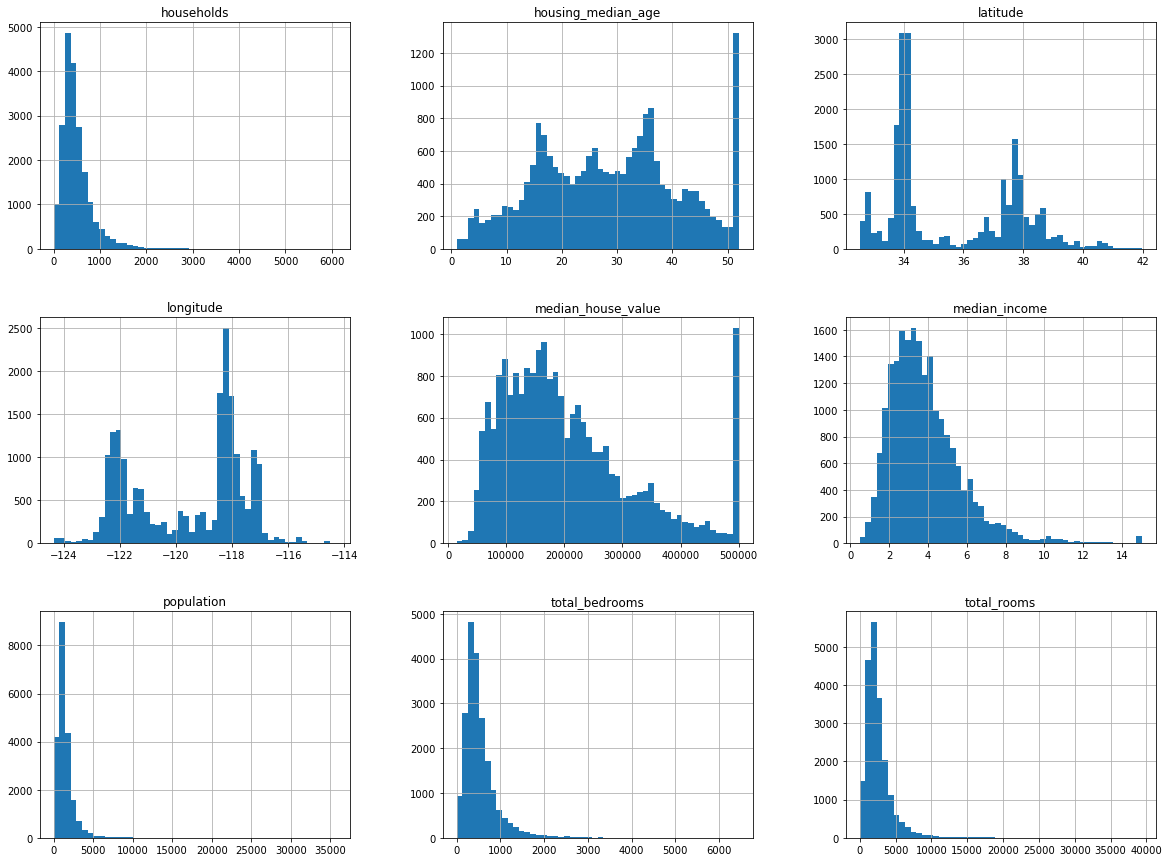

In [6]:
# Plotting Histograms
'exec(%matplotlib inline)'    # Invalid syntax: %matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Creating Test set
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [8]:
# Using md5 function
import hashlib
count = 0
for i in range (0, 256):
  lastByte = hashlib.md5(np.int64(i)).digest()[-1]
  if lastByte < int(256*0.2):
    count += 1
    #print (lastByte)
print ('Count', count)

Count 46


In [9]:
# Using np.ceil function
for i in [1.27, 1.45, 1.58, 1.93, 2.11, 2.99]:
  print (i, ' ~= ', np.ceil(i))

1.27  ~=  2.0
1.45  ~=  2.0
1.58  ~=  2.0
1.93  ~=  2.0
2.11  ~=  3.0
2.99  ~=  3.0


In [10]:
# Creating A Test Set Using Id
import hashlib
def test_set_check(identifier, test_ratio, hash):
  # Put the instance in the test set if this value is lower or equal to 51 (~20% of 256).
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
  return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


In [11]:
# Using train_test_split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [12]:
# Important Attribute: 'median income'
housing["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

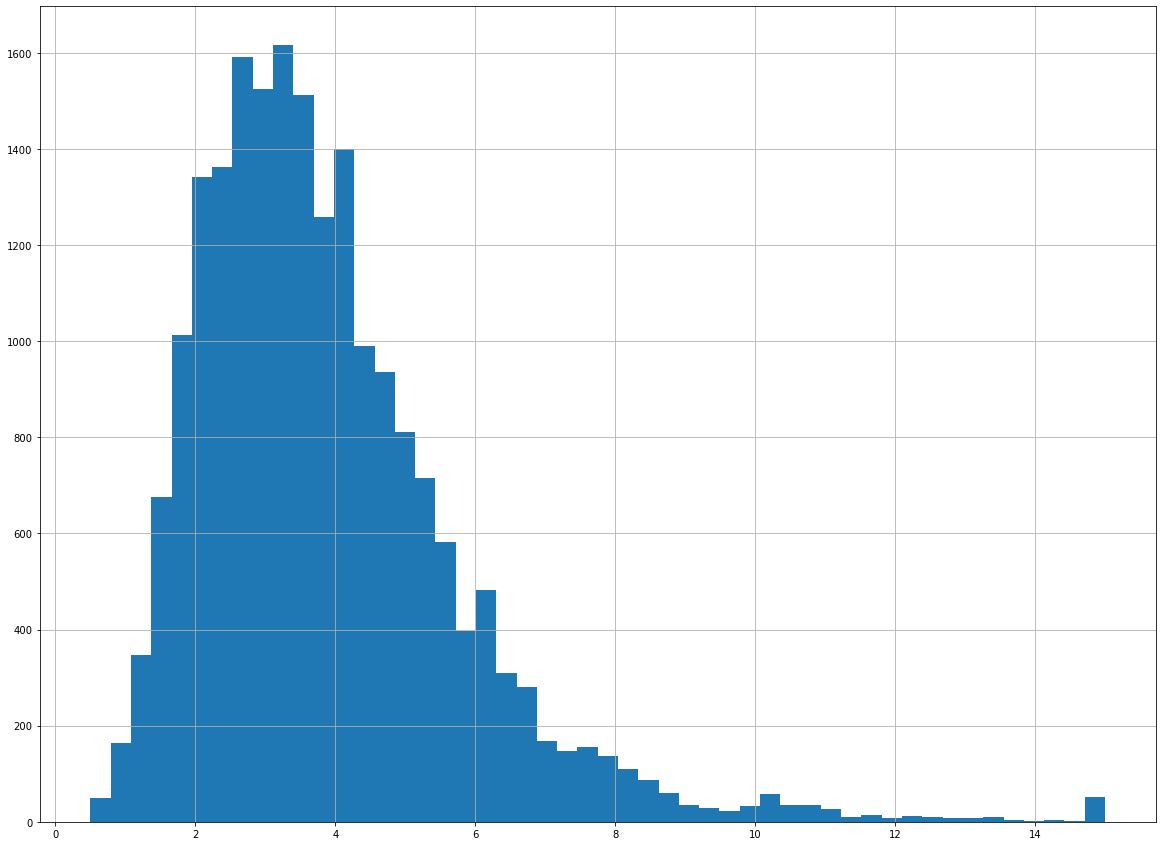

In [13]:
# Plotting median_income Histogram
'exec(%matplotlib inline)' #%matplotlib inline
import matplotlib.pyplot as plt
housing["median_income"].hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# Creating new attribute (income_cat)
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [15]:
# Verifying The Income Category Proportions
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print ('Training set:')
print (train_set["income_cat"].value_counts() / len(train_set))
print ('Test set:')
print (test_set["income_cat"].value_counts() / len(test_set))

Training set:
3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64
Test set:
3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64


In [16]:
# Using StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [17]:
# Verifying The Income Category Proportions
print ('Full dataset:')
print (housing["income_cat"].value_counts() / len(housing))
print ('Training set:')
print (strat_train_set["income_cat"].value_counts() / len(strat_train_set))
print ('Test set:')
print (strat_test_set["income_cat"].value_counts() / len(strat_test_set))

Full dataset:
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
Training set:
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
Test set:
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


In [18]:
# Reverting The Data To Original State: remove "income_cat"
for set in (strat_train_set, strat_test_set):
  if 'income_cat' in set.columns:
    set.drop(["income_cat"], axis=1, inplace=True)
# create a copy so you can play with it without
# harming the training set:
housing = strat_train_set.copy()

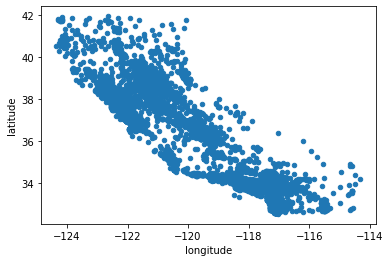

In [19]:
# Visualizing Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude")

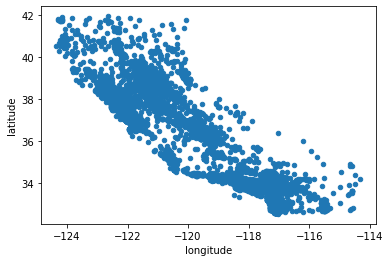

In [20]:
# Showing High Density Of Data Points
housing.plot(kind="scatter", x="longitude", y="latitude")

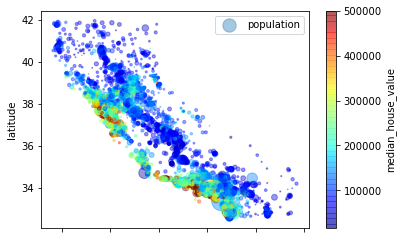

In [21]:
# Showing population & median_house_value
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
# The radius of each circle represents the district’s population (option s), and
# the color represents the price (option c).
plt.legend()

In [22]:
# Looking for Correlations
# Compute the standard correlation coefficient (also called Pearson’s r)
# between every pair of attributes
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

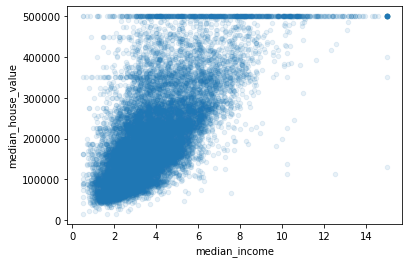

In [23]:
# Plotting Correlation
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [24]:
# Experimenting with Attribute Combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [25]:
# Preparing Data
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [26]:
# Using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
#print (imputer.statistics_)
print ('Median values:', housing_num.median().values)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.describe()

Median values: [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [27]:
# Converting Text Labels To Numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
print ('Original text labels:', encoder.classes_)
print ('New values:', housing_cat_encoded)

Original text labels: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
New values: [0 0 4 ... 1 0 3]


In [28]:
# Using OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
print (housing_cat_1hot.shape)
print ('One-hot values:')
print (housing_cat_1hot.toarray())

(16512, 5)
One-hot values:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [29]:
# Using LabelBinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
print (housing_cat_1hot.shape)
print ('One-hot values:')
print (housing_cat_1hot)

(16512, 5)
One-hot values:
[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]


In [30]:
# Custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y=None):
    return self # nothing else to do

  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [31]:
# Implementing Min-Max Scaling
import numpy as np
x1 = [89, 72, 94, 69]
x1_min = np.min(x1)
print ('x1 min:', x1_min)
x1_max = np.max(x1)
print ('x1 max:', x1_max)
x1_scaled = (x1 - x1_min)/(x1_max - x1_min)
print ('x1_scaled:', x1_scaled)

x1 min: 69
x1 max: 94
x1_scaled: [0.8  0.12 1.   0.  ]


In [32]:
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
x1 = [[89], [72], [94], [69]]
minMaxScaler = MinMaxScaler()
x1_scaled = minMaxScaler.fit_transform(x1)
#value(i) = (value(i) - min)/(max - min)
print ('x1_scaled:')
print (x1_scaled)
x2 = [[89, 0.8], [72, 0.12], [94, 1], [69, 0]]
x2_scaled = minMaxScaler.fit_transform(x2)
print ('x2_scaled:')
print (x2_scaled)

x1_scaled:
[[0.8 ]
 [0.12]
 [1.  ]
 [0.  ]]
x2_scaled:
[[0.8  0.8 ]
 [0.12 0.12]
 [1.   1.  ]
 [0.   0.  ]]


In [33]:
# Standardization
import numpy as np
x1 = [89, 72, 94, 69]
x1_mu = np.sum(x1)/len(x1)
print ('x1_mu:', x1_mu)
x1_std = np.sqrt(np.sum((x1 - x1_mu)**2)/4)
print ('x1_std:', x1_std)
x1_normalized = (x1 - x1_mu)/x1_std
print ('x1_normalized:', x1_normalized)

x1_mu: 81.0
x1_std: 10.700467279516348
x1_normalized: [ 0.7476309  -0.84108476  1.21490022 -1.12144635]


In [34]:
# Using StandardScaler
from sklearn.preprocessing import StandardScaler
x1 = [[89], [72], [94], [69]]
standardScaler = StandardScaler()
x1_normalized = standardScaler.fit_transform(x1)
#value(i) = (value(i) - mean)/(variance) ### unit variance
print ('x1_normalized:')
print (x1_normalized)
x2 = [[89, 0.8], [72, 0.12], [94, 1], [69, 0]]
x2_normalized = standardScaler.fit_transform(x2)
print ('x2_normalized:')
print (x2_normalized)

x1_normalized:
[[ 0.7476309 ]
 [-0.84108476]
 [ 1.21490022]
 [-1.12144635]]
x2_normalized:
[[ 0.7476309   0.7476309 ]
 [-0.84108476 -0.84108476]
 [ 1.21490022  1.21490022]
 [-1.12144635 -1.12144635]]


In [35]:
# Transformation Pipelines (I)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
print(housing_num.iloc[[0]])
num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
  ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr [0]

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  


array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753])

In [36]:
# Transformation Pipelines (II)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelBinarizer
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names].values

class LabelBinarizerPipelineFriendly(LabelBinarizer):
  def fit(self, X, y=None):
    """This change would allow us to fit the model based on the X input."""
    super(LabelBinarizerPipelineFriendly, self).fit(X)

  def transform(self, X, y=None):
    return super(LabelBinarizerPipelineFriendly, self).transform(X)

  def fit_transform(self, X, y=None):
    return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)


In [37]:
# Transformation Pipelines (III)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
# housing_num = housing.drop("ocean_proximity", axis=1)
# print (list(housing_num))
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_attribs)),
  ('imputer', SimpleImputer(strategy="median")),
  ('attribs_adder', CombinedAttributesAdder()),
  ('std_scaler', StandardScaler()),
  ])
cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_attribs)),
  ('label_binarizer', LabelBinarizerPipelineFriendly()),
  ])
full_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
  ])

In [38]:
# Transformation Pipelines (IV)
housing_prepared = full_pipeline.fit_transform(housing)
print ('Shape:', housing_prepared.shape)
print ('First row:')
print (housing_prepared[0])

Shape: (16512, 16)
First row:
[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
 -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
  0.          0.          0.          0.        ]


In [39]:
# Training A LinearRegression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
print (lin_reg.coef_)
print (lin_reg.intercept_)

[-55650.4116403  -56716.45236929  13732.83841856  -1933.1277138
   7330.04062103 -45708.26306673  45455.47519691  74714.39134154
   6605.12802802   1042.95709453   9249.75886697 -18016.52432168
 -55219.15208555 110357.78363967 -22479.84008184 -14642.2671506 ]
236914.99732815966


In [40]:
# Evaluating On The Training Set
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,
housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print ('mean_squared_error:',lin_rmse)

mean_squared_error: 68628.19819848923


In [41]:
# Training A DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,
housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print ('mean_squared_error:',tree_rmse)
#Wait, what!? No error at all?

mean_squared_error: 0.0


In [42]:
# Implementing Cross-Validation for DecisionTreeRegressor Model
from sklearn.model_selection import cross_val_score
#K-fold cross-validation: it randomly splits the training set into 10 distinct
#subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
#picking a different fold for evaluation every time and training on the other 9 folds.
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
#Scoring function is actually the opposite of the MSE
rmse_scores = np.sqrt(-scores)
print ('Scores:', rmse_scores,
      '\nMean:', rmse_scores.mean(),
      '\nStandard deviation:', rmse_scores.std())

Scores: [68086.73921593 68534.19395168 71093.3979956  69330.78358704
 69764.61417392 74829.73078429 69468.3212721  71371.56295804
 77161.05630576 69656.44191738] 
Mean: 70929.68421617504 
Standard deviation: 2752.3395373575017


In [43]:
# Implementing Cross-Validation for LinearRegression Model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print ('Scores:', lin_rmse_scores,
  '\nMean:', lin_rmse_scores.mean(),
  '\nStandard deviation:', lin_rmse_scores.std())

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067] 
Mean: 69052.46136345083 
Standard deviation: 2731.6740017983425


In [44]:
# Training A RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
forest_scores = cross_val_score(forest_reg, housing_prepared,
housing_labels,
  scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print ('Scores:', forest_rmse_scores,
  '\nMean:', forest_rmse_scores.mean(),
  '\nStandard deviation:', forest_rmse_scores.std())

22140.625511539656
Scores: [52100.49010318 49029.90958229 52884.63605226 54891.63819051
 50289.05763716 56990.6303708  51806.72882922 49831.59766673
 55613.89907233 53387.2762365 ] 
Mean: 52682.58637409834 
Standard deviation: 2467.271482661477


In [45]:
# Grid Search (I)
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [46]:
# Grid Search (II)
GridSearchCV(cv=5, error_score='raise-deprecating',
  estimator=RandomForestRegressor(bootstrap=True,
    criterion='mse', max_depth=None,
    max_features='auto', max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_impurity_split=None,
    min_samples_leaf=1, min_samples_split=2,
    min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
    oob_score=False, random_state=None, verbose=0,
    warm_start=False),
  # fit_params=None,
  iid='warn', n_jobs=None,
  param_grid=[{'n_estimators': [3, 10, 30], 'max_features':
    [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10],
    'max_features': [2, 3, 4]}],
  pre_dispatch='2*n_jobs', refit=True,
  return_train_score='warn',
  scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid

In [47]:
# Best Params and Estimators
print ('Best params:', grid_search.best_params_)
print ('Best estimator:', grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print('Score:' + str(np.sqrt(-mean_score)) + '. Params:' + str(params))

Best params: {'max_features': 8, 'n_estimators': 30}
Best estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Score:64116.41185384481. Params:{'max_features': 2, 'n_estimators': 3}
Score:55791.80269741488. Params:{'max_features': 2, 'n_estimators': 10}
Score:52739.47388178669. Params:{'max_features': 2, 'n_estimators': 30}
Score:61406.87404047146. Params:{'max_features': 4, 'n_estimators': 3}
Score:52946.64554461265. Params:{'max_features': 4, 'n_estimators': 10}
Score:50434.65652111172. Params:{'max_features': 4, 'n_estimators': 30}
Score:5934

In [48]:
### Fix for below
encoder = OneHotEncoder(categories='auto')
encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# Analyzing The Best Mode
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.categories_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[7.18258144e-02 6.22318025e-02 4.13536132e-02 1.62803444e-02
 1.47177140e-02 1.51405936e-02 1.54799996e-02 3.54392547e-01
 5.10713594e-02 1.09821877e-01 6.44836024e-02 1.00312717e-02
 1.68419526e-01 1.37613139e-04 1.61203591e-03 3.00028543e-03]


[(0.3543925470043127, 'median_income'),
 (0.10982187698136935, 'pop_per_hhold'),
 (0.0718258144134393, 'longitude'),
 (0.0644836024284552, 'bedrooms_per_room'),
 (0.06223180247403351, 'latitude'),
 (0.051071359380959316, 'rooms_per_hhold'),
 (0.04135361317242857, 'housing_median_age'),
 (0.016280344366327328, 'total_rooms'),
 (0.015479999631556591, 'households'),
 (0.015140593609990096, 'population'),
 (0.014717714034927073, 'total_bedrooms'),
 (0.010031271694154492, array([0, 1, 2, 3, 4]))]

In [49]:
# Evaluating The Best Model On The Test Set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print ('RMSE:', final_rmse)

RMSE: 48396.38363707528
